In [1]:
import pandas as pd
import numpy as np
import glob
# display all the columns
pd.options.display.max_columns = None
from functools import reduce
import datetime as dt
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt   #Data visualisation libraries 
import pickle
from xgboost import XGBClassifier
from xgboost import XGBRegressor 
from matplotlib import pyplot
from xgboost import plot_importance
import os 

import altair as alt
#alt.renderers.enable('notebook')
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

## Get  data

In [3]:
path = r"C:\Users\BE106641\Documents\Data Science\Use Case\Sales Forecast Automotive"
path_excel = r"C:\Users\BE106641\Documents\Data Science\Use Case\Sales Forecast Automotive\New Data Set"

pickle_in = open(os.path.join(path, "df_data_combined_M1_M2_MD.pickle"),"rb")
df = pickle.load(pickle_in)

df_SOP = pd.read_excel(r'C:\Users\BE106641\Documents\Data Science\Git\Sales-Auto\Copy of Book1.xlsx',sheet_name = 'Sheet7')

df_human_fct = pd.read_excel(r'C:\Users\BE106641\Documents\Data Science\Use Case\Sales Forecast Automotive\New Data Set\forecast 2018 - Copy.xlsx')

df_human_fct.columns = df_human_fct.columns.str.lower()
df_human_fct = df_human_fct.rename(columns=lambda x: x.replace('\n', ' ').strip())
df_human_fct = df_human_fct[df_human_fct['market']==2]

df_human_fct

product  market  qty fct h 2018  qty fct h 2019  qty fct h 2020  \
12    6300077       2            2048            2280            1140   
13    6300078       2            2048            2280            1140   
107   6904235       2               0               0               0   
108   6904237       2               0               0               0   
109   6903106       2               0               0               0   
...       ...     ...             ...             ...             ...   
7056  6901701       2             278             240             240   
7057  6902593       2              21              30              30   
7058  6901700       2              91              30              30   
7059  6902592       2              36              30              30   
7060  6901699       2              91              30              30   

      qty fct h 2021  
12                 0  
13                 0  
107                0  
108                0  
109                0  
...              ...  
7056             240  
7057              30  
7058              30  
7059              30  
7060              30  

[3476 rows x 6 columns]

##### merge historical data (2007 - 2019) with human forecast

In [4]:
df.shape

(3928, 41)

In [5]:
df_human_fct.drop(columns = ["market"],axis = 1, inplace = True)

In [6]:
df_human_fct = df_human_fct.groupby(['product'],as_index = False).sum()

In [186]:
df_combined = pd.merge(df, df_SOP,  how='left', on=['product'])
df_combined['SOP'] = df_combined['SOP'].dt.year 
print(df_combined.shape)
df_combined.drop(columns = ["market"],axis = 1, inplace = True)

(3928, 42)


In [187]:
df_combined.iloc[:,13:] = df_combined.iloc[:,13:].fillna(0)

# 1. Feature Analysis

### Filter Data set

In [189]:
df_combined.loc[df_combined['qty total M2 2007']>0, 'flag_2007'] = 1
df_combined.loc[df_combined['qty total M2 2008']>0, 'flag_2008'] = 1
df_combined.loc[df_combined['qty total M2 2009']>0, 'flag_2009'] = 1
df_combined.loc[df_combined['qty total M2 2010']>0, 'flag_2010'] = 1
df_combined.loc[df_combined['qty total M2 2011']>0, 'flag_2011'] = 1
df_combined.loc[df_combined['qty total M2 2012']>0, 'flag_2012'] = 1
df_combined.loc[df_combined['qty total M2 2013']>0, 'flag_2013'] = 1
df_combined.loc[df_combined['qty total M2 2014']>0, 'flag_2014'] = 1
df_combined.loc[df_combined['qty total M2 2015']>0, 'flag_2015'] = 1
df_combined.loc[df_combined['qty total M2 2016']>0, 'flag_2016'] = 1
df_combined.loc[df_combined['qty total M2 2017']>0, 'flag_2017'] = 1
df_combined.loc[df_combined['qty total M2 2018']>0, 'flag_2018'] = 1
df_combined.loc[df_combined['qty total M2 2019']>0, 'flag_2019'] = 1
df_combined.loc[df_combined['qty total M2 2007']<=0, 'flag_2007'] = 0
df_combined.loc[df_combined['qty total M2 2008']<=0, 'flag_2008'] = 0
df_combined.loc[df_combined['qty total M2 2009']<=0, 'flag_2009'] = 0
df_combined.loc[df_combined['qty total M2 2010']<=0, 'flag_2010'] = 0
df_combined.loc[df_combined['qty total M2 2011']<=0, 'flag_2011'] = 0
df_combined.loc[df_combined['qty total M2 2012']<=0, 'flag_2012'] = 0
df_combined.loc[df_combined['qty total M2 2013']<=0, 'flag_2013'] = 0
df_combined.loc[df_combined['qty total M2 2014']<=0, 'flag_2014'] = 0
df_combined.loc[df_combined['qty total M2 2015']<=0, 'flag_2015'] = 0
df_combined.loc[df_combined['qty total M2 2016']<=0, 'flag_2016'] = 0
df_combined.loc[df_combined['qty total M2 2017']<=0, 'flag_2017'] = 0
df_combined.loc[df_combined['qty total M2 2018']<=0, 'flag_2018'] = 0
df_combined.loc[df_combined['qty total M2 2019']<=0, 'flag_2019'] = 0

In [190]:
df_combined['flag_tot'] = df_combined['flag_2007'] + df_combined['flag_2008'] + df_combined['flag_2009'] + df_combined['flag_2010'] + df_combined['flag_2011'] + df_combined['flag_2012'] + df_combined['flag_2013'] + df_combined['flag_2014'] + df_combined['flag_2015'] + df_combined['flag_2016'] + df_combined['flag_2017'] + df_combined['flag_2018'] + df_combined['flag_2019'] 

In [191]:
print(df_combined.shape)
#df_combined = df_combined[df_combined['flag_tot']>1]
print(df_combined.shape)

(3928, 55)
(3928, 55)


In [192]:
df_combined.head(4)

product        product description  tier level family sub family  \
0  6960311.0  W/S X KR 250 HT CLA L NSE         0.0    WSC        WNH   
1  6960312.0  FFX X KR 250 HT CLA L NSE         0.0    SID        SLN   
2  6991779.0  F/D X KR 250 HT CLA T NSE         0.0    SID        SNH   
3  6991780.0  FVT X KR 250 HT CLA T NSE         0.0    SID        SNH   

  commercial family brand    brand group gkam model body risk  \
0               WSC    KR  LOCAL RUSSIAN  G14   250   HT   S1   
1               SLL    KR  LOCAL RUSSIAN  G14   250   HT   S1   
2               S/L    KR  LOCAL RUSSIAN  G14   250   HT   S1   
3               S/L    KR  LOCAL RUSSIAN  G14   250   HT   S1   

   qty total M1 2007  qty total M1 2008  qty total M1 2009  qty total M1 2010  \
0             3911.0             2600.0              250.0                0.0   
1             5368.0             4590.0              200.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   

   qty total M1 2011  qty total M1 2012  qty total M1 2013  qty total M1 2014  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   

   qty total M1 2015  qty total M1 2016  qty total M1 2017  qty total M1 2018  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   

   qty total M1 2019  qty total M2 2007  qty total M2 2008  qty total M2 2009  \
0                0.0             3424.0             2400.0              150.0   
1                0.0             1200.0              400.0                0.0   
2                0.0             5725.0              405.0              400.0   
3                0.0             5490.0             1205.0              400.0   

   qty total M2 2010  qty total M2 2011  qty total M2 2012  qty total M2 2013  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   

   qty total M2 2014  qty total M2 2015  qty total M2 2016  qty total M2 2017  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   

   qty total M2 2018  qty total M2 2019  qty total M1  qty total M2  SOP  \
0                0.0                0.0        6761.0        5974.0  0.0   
1                0.0                0.0       10158.0        1600.0  0.0   
2                0.0                0.0           0.0        6530.0  0.0   
3                0.0                0.0           0.0        7095.0  0.0   

   flag_2007  flag_2008  flag_2009  flag_2010  flag_2011  flag_2012  \
0        1.0        1.0        1.0        0.0        0.0        0.0   
1        1.0        1.0        0.0        0.0        0.0        0.0   
2        1.0        1.0        1.0        0.0        0.0        0.0   
3        1.0        1.0        1.0        0.0        0.0        0.0   

   flag_2013  flag_2014  flag_2015  flag_2016  flag_2017  flag_2018  \
0        0.0        0.0        0.0        0.0        0.0        0.0  

In [193]:
df_combined.drop(columns = ['flag_2007','flag_2008','flag_2009','flag_2010','flag_2011','flag_2012','flag_2013','flag_2014','flag_2015','flag_2016','flag_2017','flag_2018','flag_2019'],inplace = True)

### split datasets by year

In [216]:
X_DataSet = {}
y_DataSet = {}

In [217]:
df_combined_2014 = df_combined.copy()
#df_combined_2014 = df_combined_2014[df_combined_2014['qty total M2 2014']>0]
print(df_combined_2014.shape)
X_2014 = df_combined_2014.drop(columns = ['qty total M2 2014','qty total M1 2014','qty total M2 2015','qty total M1 2015','qty total M2 2016','qty total M1 2016','qty total M2 2017','qty total M1 2017','qty total M2 2018','qty total M1 2018','qty total M2 2019','qty total M1 2019','product','product description','sub family','qty total M1','qty total M2'])
X_2014['Year']=2014
y_2014 = df_combined_2014[['qty total M2 2017']]
X_2014.drop(X_2014[['model','risk']],axis = 1, inplace = True)
X_DataSet[2014] = X_2014
y_DataSet[2014] = y_2014

(3928, 42)


In [218]:
df_combined_2015 = df_combined.copy()
#df_combined_2015 = df_combined_2015[df_combined_2015['qty total M2 2015']>0]
print(df_combined_2015.shape)
X_2015 = df_combined_2015.drop(columns = ['qty total M2 2015','qty total M1 2015','qty total M2 2016','qty total M1 2016','qty total M2 2017','qty total M1 2017','qty total M2 2018','qty total M1 2018','qty total M2 2019','qty total M1 2019','product','product description','sub family','qty total M1','qty total M2'])
X_2015['Year']=2015
y_2015 = df_combined_2015[['qty total M2 2018']]
X_2015.drop(X_2015[['model','risk']],axis = 1, inplace = True)
X_DataSet[2015] = X_2015
y_DataSet[2015] = y_2015

(3928, 42)


In [219]:
df_combined_2016 = df_combined.copy()
#df_combined_2016 = df_combined_2016[df_combined_2016['qty total M2 2016']>0]
print(df_combined_2016.shape)
X_2016 = df_combined_2016.drop(columns = ['qty total M2 2016','qty total M1 2016','qty total M2 2017','qty total M1 2017','qty total M2 2018','qty total M1 2018','qty total M2 2019','qty total M1 2019','product','product description','sub family','qty total M1','qty total M2'])
X_2016['Year']=2016
y_2016 = df_combined_2016[['qty total M2 2019']]
X_2016.drop(X_2016[['model','risk']],axis = 1, inplace = True)
X_DataSet[2016] = X_2016
y_DataSet[2016] = y_2016

(3928, 42)


In [220]:
df_combined_2017 = df_combined.copy()
#df_combined_2017 = df_combined_2017[df_combined_2017['qty total M2 2017']>0]
print(df_combined_2017.shape)
X_2017 = df_combined_2017.drop(columns = ['qty total M2 2017','qty total M1 2017','qty total M2 2018','qty total M1 2018','qty total M2 2019','qty total M1 2019','product','product description','sub family','qty total M1','qty total M2'])
X_2017['Year']=2017
y_2017 = df_combined_2017[['qty total M2 2019']]
X_2017.drop(X_2017[['model','risk']],axis = 1, inplace = True)
#X_DataSet[2017] = X_2017
#y_DataSet[2017] = y_2017

(3928, 42)


In [221]:
df_combined_2018 = df_combined.copy()
#df_combined_2018 = df_combined_2018[df_combined_2018['qty total M2 2018']>0]
print(df_combined_2018.shape)
X_2018 = df_combined_2018.drop(columns = ['qty total M2 2018','qty total M1 2018','qty total M2 2019','qty total M1 2019','product','product description','sub family','qty total M1','qty total M2'])
y_2018 = df_combined_2018[['qty total M2 2019']]
X_2018['Year']=2018
X_2018.drop(X_2018[['model','risk']],axis = 1, inplace = True)
#X_DataSet[2018] = X_2018
#y_DataSet[2018] = y_2018

(3928, 42)


In [222]:
df_combined_2019 = df_combined.copy()
#df_combined_2019 = df_combined_2019[df_combined_2019['qty total M2 2019']>0]
print(df_combined_2019.shape)
X_2019 = df_combined_2019.drop(columns = ['qty total M2 2019','qty total M1 2019','product','product description','sub family','qty total M1','qty total M2'])
y_2019 = df_combined_2019[['qty total M2 2019']]
X_2019['Year']=2019
X_2019.drop(X_2019[['model','risk']],axis = 1, inplace = True)
#X_DataSet[2019] = X_2019
#y_DataSet[2019] = y_2019

(3928, 42)


In [223]:
column_list = X_2019.columns[0:9]
column_list

Index(['tier level', 'family', 'commercial family', 'brand', 'brand group',
       'gkam', 'body', 'qty total M1 2007', 'qty total M1 2008'],
      dtype='object')

In [224]:
for year in X_DataSet:
    for column in column_list:
        X_DataSet[year][column] = X_DataSet[year][column].astype('category')
        X_DataSet[year][column] = X_DataSet[year][column].cat.codes

### Rename Columns

In [225]:
year = 2016
X = X_DataSet[year].head(2)
X

tier level  family  commercial family  brand  brand group  gkam  body  \
0           0       2                 11     17           13    12    11   
1           0       1                  8     17           13    12    11   

   qty total M1 2007  qty total M1 2008  qty total M1 2009  qty total M1 2010  \
0                260                209              250.0                0.0   
1                296                272              200.0                0.0   

   qty total M1 2011  qty total M1 2012  qty total M1 2013  qty total M1 2014  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   

   qty total M1 2015  qty total M2 2007  qty total M2 2008  qty total M2 2009  \
0                0.0             3424.0             2400.0              150.0   
1                0.0             1200.0              400.0                0.0   

   qty total M2 2010  qty total M2 2011  qty total M2 2012  qty total M2 2013  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   

   qty total M2 2014  qty total M2 2015  SOP  flag_tot  Year  
0                0.0                0.0  0.0       3.0  2016  
1                0.0                0.0  0.0       2.0  2016

In [230]:
for year in X_DataSet:
    X_DataSet[year] = X_DataSet[year].rename(columns={  
                            'qty total M1 %d' %(year-7):'qty total M1 Y-6'
                          , 'qty total M1 %d' %(year-6):'qty total M1 Y-5'
                          , 'qty total M1 %d' %(year-5):'qty total M1 Y-4'
                          , 'qty total M1 %d' %(year-4):'qty total M1 Y-3'
                          , 'qty total M1 %d' %(year-3):'qty total M1 Y-2'
                          , 'qty total M1 %d' %(year-2):'qty total M1 Y-1'
                          , 'qty total M1 %d' %(year-1):'qty total M1 Y'
                          , 'qty total M2 %d' %(year-7):'qty total M2 Y-6'
                          , 'qty total M2 %d' %(year-6):'qty total M2 Y-5'
                          , 'qty total M2 %d' %(year-5):'qty total M2 Y-4'
                          , 'qty total M2 %d' %(year-4):'qty total M2 Y-3'
                          , 'qty total M2 %d' %(year-3):'qty total M2 Y-2'
                          , 'qty total M2 %d' %(year-2):'qty total M2 Y-1'
                          , 'qty total M2 %d' %(year-1):'qty total M2 Y'})

In [231]:
columns_final = { 'tier level', 'family', 'commercial family', 'brand',
       'brand group', 'gkam', 'body', 'qty total M1 Y-6', 'qty total M1 Y-5', 'qty total M1 Y-4',
       'qty total M1 Y-3', 'qty total M1 Y-2', 'qty total M1 Y-1',
       'qty total M1 Y', 'qty total M2 Y-6', 'qty total M2 Y-5', 'qty total M2 Y-4',
       'qty total M2 Y-3', 'qty total M2 Y-2', 'qty total M2 Y-1',
       'qty total M2 Y', 'SOP','Year'}

In [232]:
for year in X_DataSet:
    X_DataSet[year] = X_DataSet[year][X_DataSet[year].columns.intersection(columns_final)]

In [233]:
for year in X_DataSet:
    X_DataSet[year]['qty total (Y-6) - (Y-4) M1']= X_DataSet[year][['qty total M1 Y-6','qty total M1 Y-5','qty total M1 Y-4']].sum(axis=1)
    X_DataSet[year]['qty total (Y-6) - (Y-4) M2']= X_DataSet[year][['qty total M2 Y-6','qty total M2 Y-5','qty total M2 Y-4']].sum(axis=1)
    X_DataSet[year].drop(X_DataSet[year][['qty total M1 Y-6','qty total M1 Y-5','qty total M1 Y-4']],axis = 1, inplace = True)
    X_DataSet[year].drop(X_DataSet[year][['qty total M2 Y-6','qty total M2 Y-5','qty total M2 Y-4']],axis = 1, inplace = True)

#### Rename y datasets

In [234]:
i = 2019 - year 
for year in y_DataSet:
    y_DataSet[year] = y_DataSet[year].rename(columns={  
                        'qty total M2 %d' %(year+i):'qty total M2 Y+%d' %(1+i)}) #Change Y+ manually

In [235]:
for year in y_DataSet:
    print(year)
    print(y_DataSet[year].columns)

2014
Index(['qty total M2 Y+4'], dtype='object')
2015
Index(['qty total M2 Y+4'], dtype='object')
2016
Index(['qty total M2 Y+4'], dtype='object')


### Concat the different datasets

In [236]:
for year in X_DataSet:
    print(X_DataSet[year].shape)

(3928, 19)
(3928, 19)
(3928, 19)


In [237]:
X = pd.concat(X_DataSet.values(), ignore_index=True)
y = pd.concat(y_DataSet.values(), ignore_index=True)

In [238]:
X.shape

(11784, 19)

#### remove features with low importance

In [239]:
X.head(2)

tier level  family  commercial family  brand  brand group  gkam  body  \
0           0       2                 11     17           13    12    11   
1           0       1                  8     17           13    12    11   

   qty total M1 Y-3  qty total M1 Y-2  qty total M1 Y-1  qty total M1 Y  \
0               0.0               0.0               0.0             0.0   
1               0.0               0.0               0.0             0.0   

   qty total M2 Y-3  qty total M2 Y-2  qty total M2 Y-1  qty total M2 Y  SOP  \
0               0.0               0.0               0.0             0.0  0.0   
1               0.0               0.0               0.0             0.0  0.0   

   Year  qty total (Y-6) - (Y-4) M1  qty total (Y-6) - (Y-4) M2  
0  2014                       719.0                      5974.0  
1  2014                       768.0                      1600.0

[14:15:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.07403034 0.06832273 0.02372433 0.02716734 0.04742257 0.04053222
 0.04212979 0.06829745 0.01627888 0.01832173 0.03134319 0.36111605
 0.14587472 0.00423548 0.01473942 0.01646376]


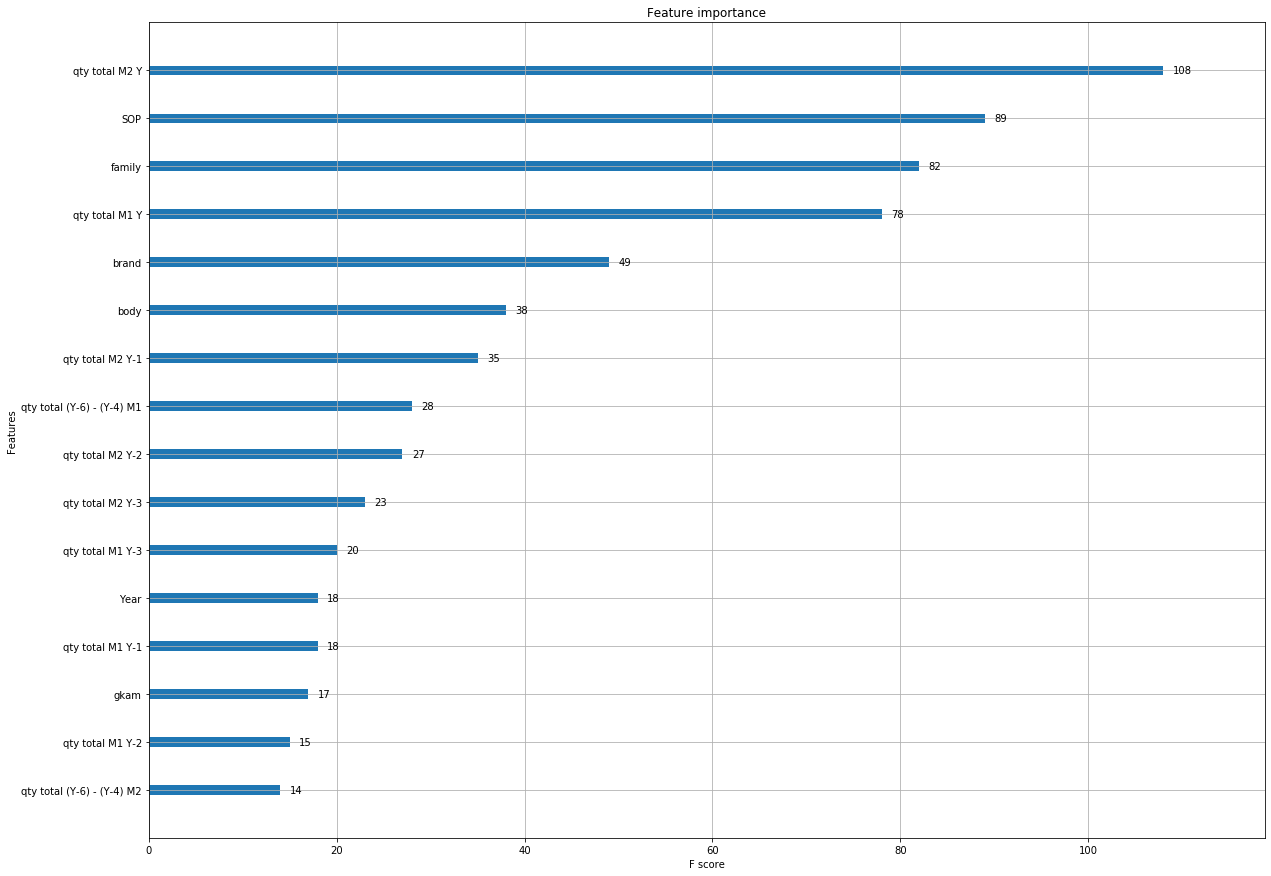

In [242]:
# fit model no training data
model = XGBRegressor()
model.fit(X, y)

# feature importance
print(model.feature_importances_)

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(20,15)

In [241]:
X.drop(X[['brand group','tier level','commercial family']],axis = 1, inplace = True)

In [117]:
#X.drop(X[['Year','body','gkam']],axis = 1, inplace = True)

## Export the model

In [180]:
pickle_out = open(r"C:\Users\BE106641\Documents\Data Science\Use Case\Sales Forecast Automotive\model_Y+4_2019_v1.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [181]:
pickle_out = open(r"C:\Users\BE106641\Documents\Data Science\Use Case\Sales Forecast Automotive\model_Y+4_v1_X_Columns.pickle","wb")
pickle.dump(X.columns, pickle_out)
pickle_out.close()

# Predict 

#### split the data set into training set

In [163]:
validation_size = 0.3
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
model.fit(X_train,y_train)
predictions = model.predict(X_validation)

print("mean abs error = "+str(mean_absolute_error(predictions,y_validation)))
print("r2 = "+str(r2_score(predictions,y_validation)))





[09:26:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean abs error = 202.29709842296592
r2 = 0.4033485510393483


In [40]:
y_validation

qty total M2 Y+1
2352             240.0
2277             220.0
968              215.0
2434             160.0
1447             480.0
...                ...
193              720.0
2395             615.0
612              105.0
3671             140.0
2544              88.0

[1173 rows x 1 columns]

In [49]:
y_validation_array = y_validation['qty total M2 Y+1'].to_list()

In [50]:
residuals = np.asarray(y_validation_array)-np.asarray(predictions)
residuals = pd.DataFrame(residuals,columns=['residuals']) 

In [54]:
#y_validation_reset = y_validation.reset_index()
#y_validation_reset

In [55]:
#df_validation_y = pd.merge(residuals,y_validation_reset,left_index = True, right_index = True)
#df_validation_y

In [56]:
#df_validation_y = df_validation_y[df_validation_y['qty total M2 Y+1']>0]
#df_validation_y

In [53]:
#df_validation_y['Weighted residuals'] = df_validation_y['residuals']*df_validation_y['qty total M2 Y+1']/df_validation_y['qty total M2 Y+1'].sum()
#df_validation_y['residuals %'] = df_validation_y['residuals']/df_validation_y['qty total M2 Y+1']
#df_validation_y

In [57]:
#df_validation_y.describe()

In [49]:
residuals

residuals
0      96.864075
1       8.800888
2    -213.974701
3     -53.165268
4    -386.323608
...          ...
1168 -131.218384
1169 -218.457825
1170  -34.670578
1171   35.196579
1172 -111.203705

[1173 rows x 1 columns]

In [50]:
residuals.quantile(0.95, numeric_only=False)

residuals    369.13186
Name: 0.95, dtype: float64

          residuals
count   2357.000000
mean      -8.577471
std      444.161494
min    -6750.284668
25%      -49.823730
50%      -13.041471
75%       17.590042
max    13567.926208


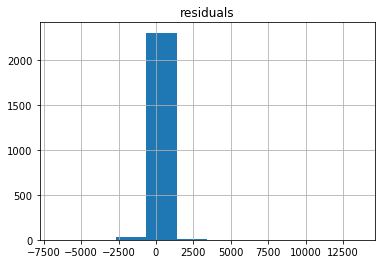

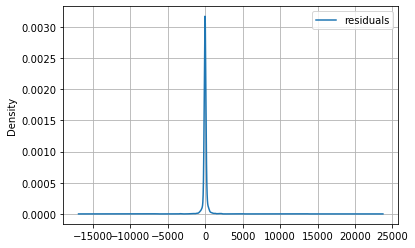

In [52]:
# summary statistics
print(residuals.describe())

# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.grid(True)
plt.show() 

In [ ]:
#sklearn.metrics
#mean square root error
#r2
#mean absolute error